# Analysis of different machine learning methods to predict the outperformance ratio of crypto-assets. 


## Chapter 1: Introduction
The premisis of this research notebook is predicting the outperformance ratio of crypto-assets by implementing various machine learning techniques. The data provided is non-linear. For the purpose of this research only supervised learning methods are exploited. We apply regressor techniques since we aim to predict a continous variable.


## Chapter 2: Dataset preparation
For the sake of scientific research we will compose different datasets.

In [74]:
# import libs 
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn import metrics

from mpl_toolkits.mplot3d import Axes3D


# import data
dataset = pd.read_csv('dataset_prep_new.csv', decimal=",")


In [4]:
# show dataset types

dataset.dtypes

name                   object
ticker                 object
geographic              int64
team_qual             float64
team_quan               int64
team_dev                int64
advisors_qual         float64
advisors_quan           int64
partnerships_qual     float64
partnerships_quan       int64
total_supply          float64
circulating_supply    float64
masternodes             int64
staking_rewards         int64
activity_rewards        int64
limited_coins           int64
discount_ei             int64
available_for_ts      float64
money_raised          float64
prc_fg                float64
ut_burned               int64
ico_price             float64
market_price          float64
current_price         float64
Unnamed: 24           float64
twitter                 int64
facebook                int64
reddit                  int64
hype_rate               int64
bounty_program          int64
                       ...   
qryptos                 int64
exx                     int64
radar rela

In [5]:
# show shape of dataset

dataset.shape

(122, 80)

In [6]:
dataset

,name,ticker,geographic,team_qual,team_quan,team_dev,advisors_qual,advisors_quan,partnerships_qual,partnerships_quan,...,first_mover,competitors,consensus_method,product_score,total_marketcap,24h_mv_icoday,datum_ico,op_ratio,return_coin,return_markt
0,request network,REQ,1,8.0,7,3,3.7,3,4.0,8,...,0,6,1,84,173.000,4323.65,16/10/2017,1.4521,3.29,2.26
1,chainlink,LINK,1,7.2,2,2,3.5,4,2.6,2,...,1,2,1,81,135.200,4290.29,19/09/2017,1.5905,4.61,2.90
2,substratum,SUB,1,6.5,6,4,2.8,2,2.3,1,...,1,2,2,66,134.920,6180.46,13/08/2017,1.8546,5.39,2.90
3,icon,ICX,2,8.9,11,9,4.2,8,4.0,9,...,0,10,4,83,136.794,3879.45,20/09/2017,8.7603,25.09,2.86
4,cindicator,CND,3,8.7,12,9,4.5,11,0.0,0,...,1,3,1,76,129.020,2379.29,24/09/2017,3.0131,9.15,3.04
5,internxt,INXT,4,3.7,6,4,2.7,2,3.0,1,...,0,8,1,66,143.595,4861.94,28/09/2017,3.0218,8.25,2.73
6,Power Ledger,POWR,5,8.9,17,4,3.2,1,3.8,9,...,1,3,1,78,147.292,2633.80,6/10/2017,1.9290,5.13,2.66
7,Electroneum,ETN,6,8.1,12,7,3.4,2,3.6,2,...,1,4,1,76,168.885,3369.51,23/10/2017,2.2415,5.20,2.32
8,Decision token/Horizon State,HST,5,8.5,5,3,3.4,6,4.2,1,...,1,13,1,62,177.881,6194.32,30/10/2017,6.7634,14.90,2.20
9,Dentacoin,DTN,7,8.7,19,10,3.5,6,3.5,21,...,1,7,2,69,184.245,5546.49,1/11/2017,2.7087,5.76,2.13


In [7]:
# show stastic parameters 

dataset.describe()

,geographic,team_qual,team_quan,team_dev,advisors_qual,advisors_quan,partnerships_qual,partnerships_quan,total_supply,circulating_supply,...,category,first_mover,competitors,consensus_method,product_score,total_marketcap,24h_mv_icoday,op_ratio,return_coin,return_markt
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,1.220000e+02,122.000000,...,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,10.442623,7.366393,11.139344,5.500000,3.215574,5.401639,2.150820,5.016393,9.989006e+04,9801.620328,...,15.795082,0.377049,5.270492,2.590164,64.827869,282.498984,11796.463033,2.316948,3.660738,1.872295
std,8.078181,0.973586,9.110266,4.360321,1.302827,3.674032,1.286564,6.163051,9.210472e+05,74423.052993,...,10.412912,0.486646,4.941036,3.063391,11.544161,181.915912,13059.253032,3.831176,6.108954,0.855339
min,1.000000,3.700000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.300000e-01,0.630000,...,1.000000,0.000000,0.000000,1.000000,15.000000,92.406000,1411.410000,0.068500,0.150000,0.490000
25%,1.000000,7.000000,6.000000,3.000000,3.200000,3.000000,1.500000,1.000000,9.939500e+01,37.467500,...,6.250000,0.000000,2.000000,1.000000,58.000000,155.067000,3945.987500,0.396925,0.680000,1.185000
50%,12.000000,7.500000,9.000000,4.000000,3.600000,5.000000,2.450000,3.000000,3.250000e+02,121.955000,...,14.000000,0.000000,4.000000,1.000000,66.500000,199.250500,5834.995000,1.022800,2.025000,1.965000
75%,15.000000,8.000000,13.000000,6.750000,4.000000,8.000000,3.200000,7.750000,1.000000e+03,386.892500,...,23.000000,1.000000,7.000000,4.000000,72.000000,330.776000,14314.875000,2.582400,3.577500,2.530000
max,30.000000,9.100000,72.000000,29.000000,4.800000,17.000000,4.200000,42.000000,1.000000e+07,756097.560000,...,39.000000,1.000000,27.000000,16.000000,86.000000,794.549000,63676.400000,27.357400,42.310000,4.240000


Dataset creation and conversion from categorical to numerical

In [8]:
dataset_1 = dataset[['team_qual','team_quan','product_score','team_dev','advisors_qual','advisors_quan','partnerships_qual','partnerships_quan', 'total_supply','circulating_supply','masternodes','staking_rewards','activity_rewards','limited_coins','discount_ei','available_for_ts','money_raised','prc_fg','ut_burned','ico_price','market_price','twitter','facebook','reddit','hype_rate','bounty_program','gt_ratio','roadmap','mvp','existence_before_ico','first_mover','competitors','op_ratio']]
dataset_1.shape
dataset_1.head()

,team_qual,team_quan,product_score,team_dev,advisors_qual,advisors_quan,partnerships_qual,partnerships_quan,total_supply,circulating_supply,...,reddit,hype_rate,bounty_program,gt_ratio,roadmap,mvp,existence_before_ico,first_mover,competitors,op_ratio
0,8.0,7,84,3,3.7,3,4.0,8,999.0,662.96,...,1788,4,0,0.466,9.0,0,0,0,6,1.4521
1,7.2,2,81,2,3.5,4,2.6,2,1000.0,350.00,...,0,3,0,0.855,0.0,0,0,1,2,1.5905
2,6.5,6,66,4,2.8,2,2.3,1,352.0,226.09,...,1232,2,0,0.875,9.5,0,1,1,2,1.8546
3,8.9,11,83,9,4.2,8,4.0,9,400.2,387.04,...,514,4,1,0.973,12.0,1,1,0,10,8.7603
4,8.7,12,76,9,4.5,11,0.0,0,2000.0,144.60,...,736,4,1,0.125,12.0,1,1,1,3,3.0131


In [9]:
pred_set = pd.read_csv('prediction_dataset.csv', decimal=",")
pred_set = pred_set[['team_qual','team_quan','product_score','team_dev','advisors_qual','advisors_quan','partnerships_qual','partnerships_quan', 'total_supply','circulating_supply','masternodes','staking_rewards','activity_rewards','limited_coins','discount_ei','available_for_ts','money_raised','prc_fg','ut_burned','ico_price','market_price','twitter','facebook','reddit','hype_rate','bounty_program','gt_ratio','roadmap','mvp','existence_before_ico','first_mover','competitors']]
pred_set.head()



,team_qual,team_quan,product_score,team_dev,advisors_qual,advisors_quan,partnerships_qual,partnerships_quan,total_supply,circulating_supply,...,facebook,reddit,hype_rate,bounty_program,gt_ratio,roadmap,mvp,existence_before_ico,first_mover,competitors
0,8.2,40,80.5,18,4.2,14,3.9,8,677,411,...,0,2999,5,0,0.1728,10.5,1,1,1,0
1,6.4,12,60.0,7,3.2,6,3.2,6,66,17,...,1569,251,3,1,0.1139,7.5,0,0,1,2
2,7.5,10,59.0,5,3.3,4,2.4,3,169,57,...,33575,58,3,1,0.0135,7.0,1,1,0,7
3,7.6,9,64.5,6,3.7,5,2.6,6,1886,1468,...,1421,89,3,1,0.0112,11.0,1,1,1,5
4,7.9,10,72.5,4,3.2,1,0.0,0,177619,133215,...,3245,323,4,0,0.0130,8.5,0,0,0,10


## boxplots

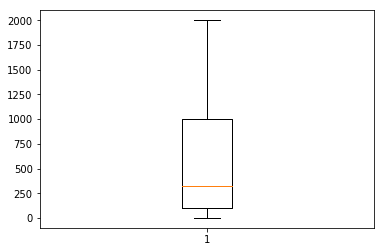

In [10]:
boxplot = dataset[['total_supply']]
boxplot = boxplot.values
plt.boxplot(boxplot, 0, '')
plt.show()

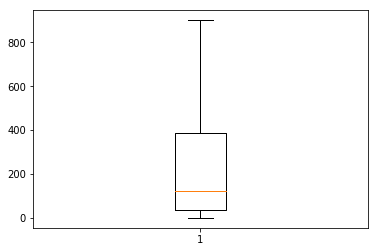

In [11]:
boxplot = dataset[['circulating_supply']]
boxplot = boxplot.values
plt.boxplot(boxplot,0, '')
plt.show()

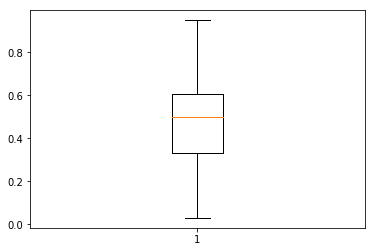

In [12]:
boxplot = dataset[['available_for_ts']]
boxplot = boxplot.values
plt.boxplot(boxplot,0, '')
plt.show()

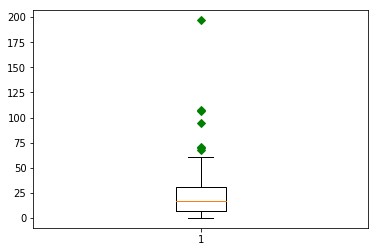

In [13]:
boxplot = dataset[['money_raised']]
boxplot = boxplot.values
plt.boxplot(boxplot, 0, 'gD')
plt.show()

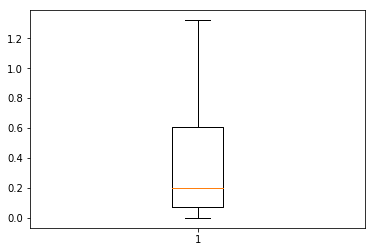

In [14]:
boxplot = dataset[['ico_price']]
boxplot = boxplot.values
plt.boxplot(boxplot ,0, '')
plt.show()

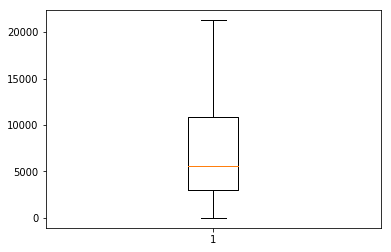

In [15]:
boxplot = dataset[['twitter']]
boxplot = boxplot.values
plt.boxplot(boxplot,0, '')
plt.show()

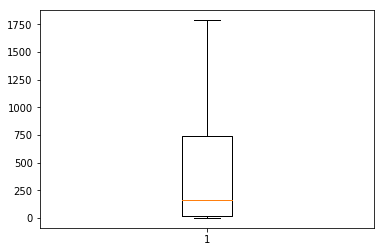

In [16]:
boxplot = dataset[['reddit']]
boxplot = boxplot.values
plt.boxplot(boxplot,0, '')
plt.show()

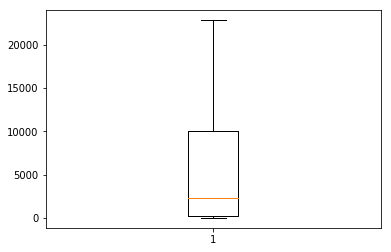

In [17]:
boxplot = dataset[['facebook']]
boxplot = boxplot.values
plt.boxplot(boxplot,0, '')
plt.show()

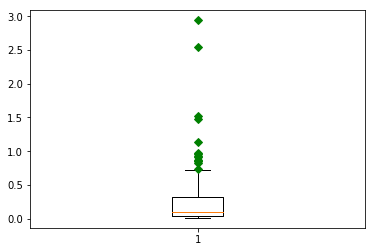

In [18]:
boxplot = dataset[['gt_ratio']]
boxplot = boxplot.values
plt.boxplot(boxplot, 0, 'gD')
plt.show()

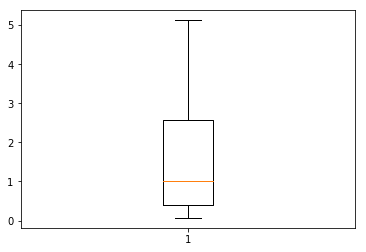

In [19]:
boxplot = dataset[['op_ratio']]
boxplot = boxplot.values
plt.boxplot(boxplot,0, '')
plt.show()

# Chapter 3 : Machine Learning

In [20]:
# creating training set and test set

feature_space = dataset_1.iloc[:, dataset_1.columns != 'op_ratio']
feature_target = dataset_1.iloc[:, dataset_1.columns == 'op_ratio']

Xtrain, Xtest, ytrain, ytest = train_test_split(feature_space,
                                                feature_target,
                                                test_size = 0.10,
                                                )
# flaten array
ytrain = ytrain.values.ravel()
ytest = ytest.values.ravel()


## Random Forest Regressor

In [21]:
# initiate random forrest regressor
regr = RandomForestRegressor()
regr.fit(Xtrain, ytrain)
y_pred = regr.predict(Xtest)  

## out-of-sample data

In [22]:
op_ratio_pred_set = regr.predict(pred_set)
print(op_ratio_pred_set)

[ 7.24499   0.86282   0.57262   1.346625  6.47656   3.31753   5.48185
  2.99597   0.63813   1.10186 ]


#### score

In [23]:
print(regr.score(Xtrain, ytrain))

0.860944154325


In [24]:
names =list(Xtrain.columns.values)
print(names)

['team_qual', 'team_quan', 'product_score', 'team_dev', 'advisors_qual', 'advisors_quan', 'partnerships_qual', 'partnerships_quan', 'total_supply', 'circulating_supply', 'masternodes', 'staking_rewards', 'activity_rewards', 'limited_coins', 'discount_ei', 'available_for_ts', 'money_raised', 'prc_fg', 'ut_burned', 'ico_price', 'market_price', 'twitter', 'facebook', 'reddit', 'hype_rate', 'bounty_program', 'gt_ratio', 'roadmap', 'mvp', 'existence_before_ico', 'first_mover', 'competitors']


#### feature importance 

In [25]:
regr.feature_importances_

array([  4.24337507e-02,   4.90954511e-02,   1.14938200e-01,
         4.61630395e-02,   3.52410230e-02,   2.83883963e-02,
         6.97919877e-02,   3.33003708e-03,   8.45034975e-02,
         1.60160781e-01,   3.56309131e-03,   1.70896136e-04,
         1.44677530e-04,   0.00000000e+00,   6.11513681e-04,
         2.45237789e-02,   2.56906191e-02,   6.02878961e-04,
         2.78046536e-04,   4.91073451e-02,   2.39523991e-02,
         2.17416278e-02,   1.14951232e-02,   8.34463366e-02,
         3.16021884e-02,   2.09029133e-02,   9.94048443e-03,
         4.06156809e-02,   3.04745208e-05,   8.41897610e-04,
         2.05798735e-04,   1.64860645e-02])

#### feature importance list

Feature ranking:
1 	 feature circulating_supply 0.160160781221
2 	 feature product_score 0.114938199564
3 	 feature total_supply 0.0845034975025
4 	 feature reddit 0.0834463366488
5 	 feature partnerships_qual 0.0697919876804
6 	 feature ico_price 0.0491073451283
7 	 feature team_quan 0.0490954511165
8 	 feature team_dev 0.0461630395012
9 	 feature team_qual 0.0424337506521
10 	 feature roadmap 0.0406156809378
11 	 feature advisors_qual 0.0352410229659
12 	 feature hype_rate 0.0316021883956
13 	 feature advisors_quan 0.0283883963491
14 	 feature money_raised 0.0256906190944
15 	 feature available_for_ts 0.0245237789137
16 	 feature market_price 0.0239523990624
17 	 feature twitter 0.0217416277904
18 	 feature bounty_program 0.0209029132856
19 	 feature competitors 0.0164860644998
20 	 feature facebook 0.0114951231614
21 	 feature gt_ratio 0.00994048442811
22 	 feature masternodes 0.00356309131011
23 	 feature partnerships_quan 0.00333003708092
24 	 feature existence_before_ico 0.000841

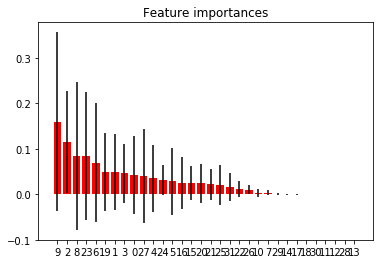

In [26]:
importances = regr.feature_importances_
std = np.std([tree.feature_importances_ for tree in regr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(Xtrain.shape[1]):
    index = indices[f]
    print(f+1, '\t',"feature" ,names[index],importances[indices[f]])
  
    
# Plot the feature importances of the forest
plt.title("Feature importances")
plt.bar(range(Xtrain.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(Xtrain.shape[1]), indices)
plt.show()

#### predicted (blue) vs true values (red)

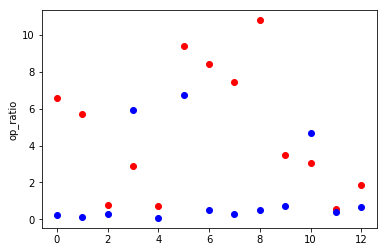

In [27]:
plt.plot(y_pred, 'ro') 
plt.plot(ytest, 'bo') 
plt.ylabel('op_ratio')
plt.show()

In [57]:
print("variance:",metrics.explained_variance_score(ytest, y_pred))
print("MAE: ",metrics.mean_absolute_error(ytest, y_pred))
print("MSE: ",metrics.mean_squared_error(ytest, y_pred))
print("Square root of MSE: ",math.sqrt(metrics.mean_squared_error(ytest, y_pred)))
print("MSLE: ",metrics.mean_squared_log_error(ytest, y_pred))
print("MAE: ",metrics.median_absolute_error(ytest, y_pred))
print("R2_score: ",metrics.r2_score(ytest, y_pred))



variance: -10.1339564784
MAE:  2.88028147553
MSE:  24.3269849502
Square root of MSE:  4.9322393443711485
MSLE:  0.59059588655
MAE:  1.1923362523
R2_score:  -15.7921147906


#### metrics

#### effect of estimators

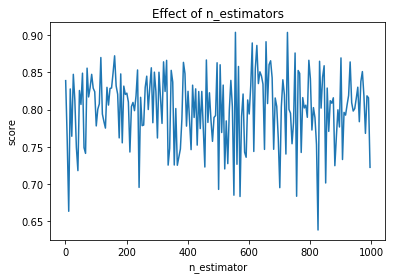

In [34]:
model = RandomForestRegressor(n_jobs=-1)
estimators = np.arange(1, 1000, 5)
scores = []
for n in estimators:
    model.fit(Xtrain, ytrain)
    model.predict(Xtest) 
    scores.append(model.score(Xtrain, ytrain))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
plt.show()

## LOOP FUNCTION

In [58]:
#make test and train set once
feature_space = dataset_1.iloc[:, dataset_1.columns != 'op_ratio']
feature_target = dataset_1.iloc[:, dataset_1.columns == 'op_ratio']

Xtrain, Xtest, ytrain, ytest = train_test_split(feature_space,
                                                feature_target,
                                                test_size = 0.10,
                                                )
# flaten array
ytrain = ytrain.values.ravel()
ytest = ytest.values.ravel()


#set how many times you want to run 
number_of_loops = 100
# create a list with the names of the features
feature_list = Xtrain.columns.values
# create a list of dictionarries
dict_list = []
#data collector lists
score = []
r2_score = []
variance_score = []
mean_squared_error = []
mean_absolute_error = []
#main loop
for n in range(number_of_loops):
    #construct a random forest regressor, train and predict
    regr = RandomForestRegressor(n_estimators=500)
    regr.fit(Xtrain, ytrain)
    y_pred = regr.predict(Xtest)
    #append the scores to previous constructed lists
    score.append(regr.score(Xtrain, ytrain))
    r2_score.append(metrics.r2_score(ytest, y_pred))
    variance_score.append(metrics.explained_variance_score(ytest, y_pred))
    mean_squared_error.append(metrics.mean_squared_error(ytest, y_pred))
    mean_absolute_error.append(metrics.mean_absolute_error(ytest, y_pred))
    #make list of keys
    keys =list(Xtrain.columns.values)
    #make list of values
    values = list(regr.feature_importances_)
    #zip into dictionarry and append them to the previous constructed dict_list
    dict_list.append(dict(zip(keys,values)))

#make an empty 2D array filled with 0's according to the input format
results_list = np.zeros((len(feature_list),number_of_loops))

#fill the empty array with values
for n in range(len(feature_list)):
    counter = 0
    for item in dict_list:
        results_list[n][counter] = item[feature_list[n]]
        counter += 1
        
# make a new dict to store the mean results
mean_results = {}
for n in range(len(feature_list)):
    mean_results[feature_list[n]]=np.mean(results_list[n])

#sort dict and print
print(sorted(mean_results.items(), key=lambda x: x[1],reverse=True))
print("")
print("metrics:")
print("score",'\t', np.mean(score))
print("r2 score", np.mean(r2_score))
print("variance ", np.mean(variance_score))
print("MSE", np.mean(mean_squared_error))
print("square root of MSE", math.sqrt(np.mean(mean_squared_error)))
print("MAE", np.mean(mean_absolute_error))
    





[('product_score', 0.099345806050560967), ('partnerships_qual', 0.09388963265033555), ('circulating_supply', 0.087047286147635225), ('money_raised', 0.081324993806767998), ('team_qual', 0.080618722978550411), ('ico_price', 0.080508193171153625), ('total_supply', 0.066742480950208224), ('roadmap', 0.047240343406026869), ('reddit', 0.0427938542297151), ('hype_rate', 0.036122562883031242), ('twitter', 0.030752344473046245), ('team_quan', 0.029149433400505857), ('advisors_qual', 0.028180212045305117), ('advisors_quan', 0.02500870915405122), ('market_price', 0.022362861164085399), ('facebook', 0.021451539415961694), ('team_dev', 0.019620825525697123), ('gt_ratio', 0.017919962557506056), ('available_for_ts', 0.017357390493445587), ('competitors', 0.015842641942194112), ('partnerships_quan', 0.013218868941665825), ('prc_fg', 0.012574731689122553), ('mvp', 0.0059379467287902525), ('first_mover', 0.0057796805292084519), ('discount_ei', 0.0048015071525552072), ('ut_burned', 0.0043955864707073055

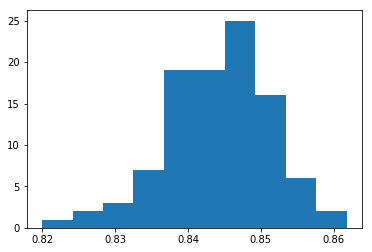

In [50]:
plt.hist(score)
plt.show()

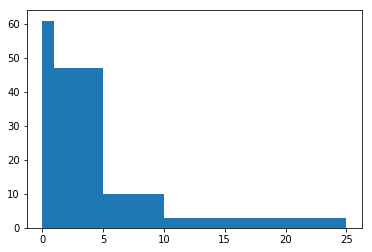

In [49]:
plt.hist(dataset_1.op_ratio, bins=[0,0.9999, 5, 10, 25])
plt.show()

## Gradient Boosting Regressor


In [111]:
#make test and train set once
feature_space = dataset_1.iloc[:, dataset_1.columns != 'op_ratio']
feature_target = dataset_1.iloc[:, dataset_1.columns == 'op_ratio']

Xtrain, Xtest, ytrain, ytest = train_test_split(feature_space,
                                                feature_target,
                                                test_size = 0.10,
                                                )
# flaten array
ytrain = ytrain.values.ravel()
ytest = ytest.values.ravel()

regr = GradientBoostingRegressor(n_estimators=500)
regr.fit(Xtrain, ytrain)
y_pred = regr.predict(Xtest)


In [112]:
print("variance:",metrics.explained_variance_score(ytest, y_pred))
print("MAE: ",metrics.mean_absolute_error(ytest, y_pred))
print("MSE: ",metrics.mean_squared_error(ytest, y_pred))
print("Square root of MSE: ",math.sqrt(metrics.mean_squared_error(ytest, y_pred)))
print("MSLE: ",metrics.mean_squared_log_error(ytest, y_pred))
print("MAE: ",metrics.median_absolute_error(ytest, y_pred))
print("R2_score: ",metrics.r2_score(ytest, y_pred))



variance: -0.496429288335
MAE:  2.83020190455
MSE:  25.3553492884
Square root of MSE:  5.035409545253594
MSLE:  0.684278003271
MAE:  1.07868282577
R2_score:  -0.54733452567


### Out-Of-Sample predicitions

In [113]:
op_ratio_pred_set = regr.predict(pred_set)
print(op_ratio_pred_set)

[ 2.18271855  0.30475391  0.81565575  1.73472832  9.31056703  3.5905175
  3.17906472  1.80735593  0.76129354  1.88783469]


In [114]:
names = dataset_1.columns.values
i = 0
for name in names:
    print(i,name)
    i+=1


0 team_qual
1 team_quan
2 product_score
3 team_dev
4 advisors_qual
5 advisors_quan
6 partnerships_qual
7 partnerships_quan
8 total_supply
9 circulating_supply
10 masternodes
11 staking_rewards
12 activity_rewards
13 limited_coins
14 discount_ei
15 available_for_ts
16 money_raised
17 prc_fg
18 ut_burned
19 ico_price
20 market_price
21 twitter
22 facebook
23 reddit
24 hype_rate
25 bounty_program
26 gt_ratio
27 roadmap
28 mvp
29 existence_before_ico
30 first_mover
31 competitors
32 op_ratio


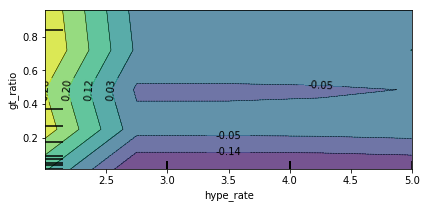

In [133]:
features = [(24,26)]
fig, axs = plot_partial_dependence(regr, Xtrain, features,
                                   feature_names=names, grid_resolution=5)
fig = plt.figure()
plt.show()


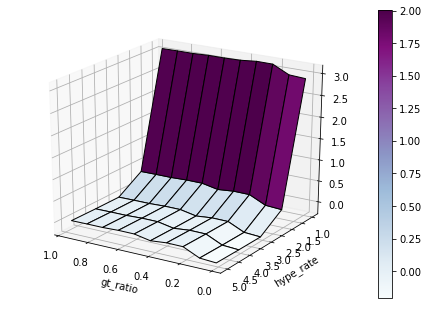

In [134]:
features = (26,24)
fig = plt.figure()
pdp, axes = partial_dependence(regr, features,
                                   X=Xtrain, grid_resolution=10)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].reshape(list(map(np.size, axes))).T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                           cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(names[features[0]])
ax.set_ylabel(names[features[1]])
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.subplots_adjust(top=0.9)
plt.show()


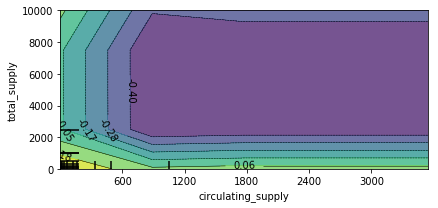

In [128]:
features = [(9,8)]
fig, axs = plot_partial_dependence(regr, Xtrain, features,
                                   feature_names=names, grid_resolution=5)
fig = plt.figure()
plt.show()



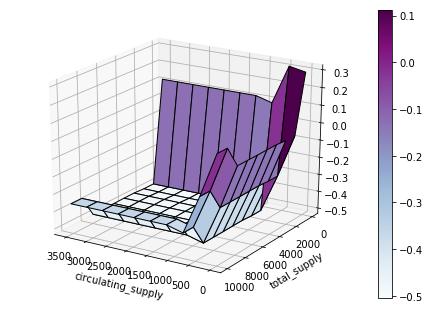

In [132]:
features = (9,8)
fig = plt.figure()
pdp, axes = partial_dependence(regr, features,
                                   X=Xtrain, grid_resolution=10)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].reshape(list(map(np.size, axes))).T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                           cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(names[features[0]])
ax.set_ylabel(names[features[1]])
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.subplots_adjust(top=0.9)
plt.show()


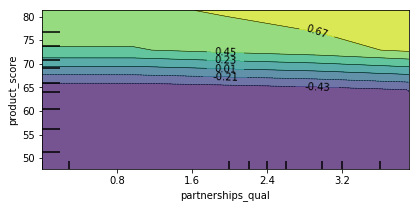

In [135]:
features = [(6,2)]
fig, axs = plot_partial_dependence(regr, Xtrain, features,
                                   feature_names=names, grid_resolution=5)
fig = plt.figure()
plt.show()


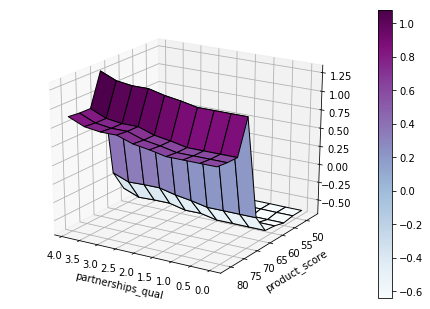

In [138]:
features = (6,2)
fig = plt.figure()
pdp, axes = partial_dependence(regr, features,
                                   X=Xtrain, grid_resolution=10)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].reshape(list(map(np.size, axes))).T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                           cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(names[features[0]])
ax.set_ylabel(names[features[1]])
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.subplots_adjust(top=0.9)
plt.show()
